## **ANALYSIS OF CUSLTERING TECHNIQUES ON CUSTOMER DATA**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/dataset/train_mall.csv')
df

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...,...
8063,464018,Male,No,22,No,NaN,0.0,Low,7.0,Cat_1,D
8064,464685,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4,D
8065,465406,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6,D
8066,467299,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6,B


In [ ]:
# Select the attributes to use for clustering
attributes = ['ID', 'Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession', 'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1', 'Segmentation']
X = df[attributes]

In [ ]:
df.isnull().sum()

ID                   0
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
df.columns

Index(['ID', 'Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1',
       'Segmentation'],
      dtype='object')

In [ ]:
le=LabelEncoder()
df[['ID', 'Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1',
       'Segmentation']] = df[['ID', 'Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1',
       'Segmentation']].apply(le.fit_transform)

In [ ]:
df

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,3441,1,0,4,0,5,1,2,3,3,3
1,3292,0,1,18,1,2,15,0,2,3,0
2,6571,0,1,44,1,2,1,2,0,5,1
3,2469,1,1,44,1,7,0,1,1,5,1
4,3315,0,1,20,1,3,15,1,5,5,0
...,...,...,...,...,...,...,...,...,...,...,...
8063,4525,1,0,4,0,9,0,2,6,0,3
8064,5130,1,0,15,0,4,3,2,3,3,3
8065,5754,0,0,14,1,5,1,2,0,5,3
8066,7461,0,0,8,1,5,1,2,3,5,1


In [ ]:
df.isnull().sum()

ID                 0
Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
Segmentation       0
dtype: int64

In [ ]:
# Normalize the data
X = (df - df.mean()) / df.std()

K-Means Clutering

In [ ]:
# Perform KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


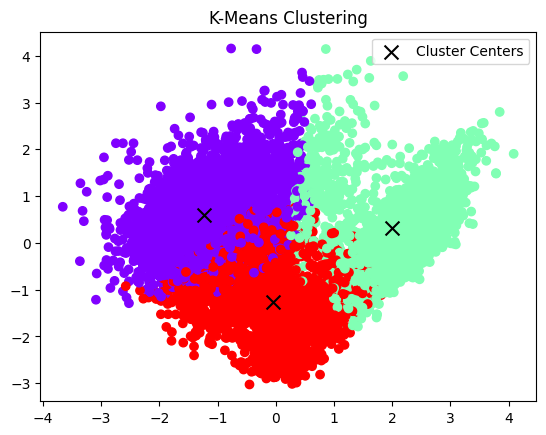

In [30]:
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

# Transform the cluster centers using PCA
cluster_centers_pca = pca.transform(kmeans.cluster_centers_)

# Plot the data points
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap='rainbow')

# Plot the cluster centers
plt.scatter(cluster_centers_pca[:, 0], cluster_centers_pca[:, 1], c='black', marker='x', s=100, label='Cluster Centers')

plt.title('K-Means Clustering')
plt.legend()
plt.show()

In [ ]:
!pip install scikit-learn-extra

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 42.4 MB/s eta 0:00:00


K MEDOID

In [ ]:
from sklearn_extra.cluster import KMedoids

In [103]:
# Perform K-Medoids clustering
kmedoids_instance = KMedoids(n_clusters=3, random_state=42)
kmedoids_instance.fit(X)

KMedoids(n_clusters=3, random_state=42)

In [104]:
# Get the cluster labels
labels = kmedoids_instance.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


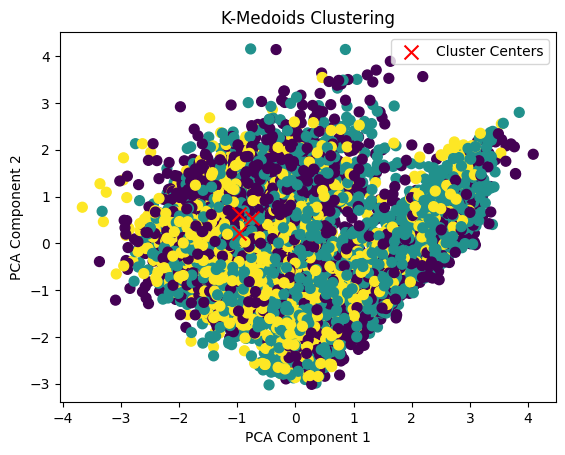

In [105]:
# Reduce dimensions using PCA
pca = PCA(n_components=2)
data_2d = pca.fit_transform(X)

# Transform the cluster centers using PCA
cluster_centers_2d = pca.transform(kmedoids_instance.cluster_centers_)

# Plot the scatterplot
plt.scatter(data_2d[:, 0], data_2d[:, 1], c=kmedoids_instance.labels_, cmap='viridis', marker='o', s=50)

# Plot the cluster centers
plt.scatter(cluster_centers_2d[:, 0], cluster_centers_2d[:, 1], c='red', marker='x', s=100, label='Cluster Centers')

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-Medoids Clustering')
plt.legend()
plt.show()

### HIRERICAL CLUSTERING

In [ ]:
from sklearn.cluster import AgglomerativeClustering

In [ ]:
from sklearn.preprocessing import StandardScaler
# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)

In [ ]:
# Perform hierarchical clustering
cluster = AgglomerativeClustering(n_clusters=None, distance_threshold=0, affinity='euclidean', linkage='ward')
cluster.fit_predict(data_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([7560, 6377, 7897, ...,    2,    1,    0])

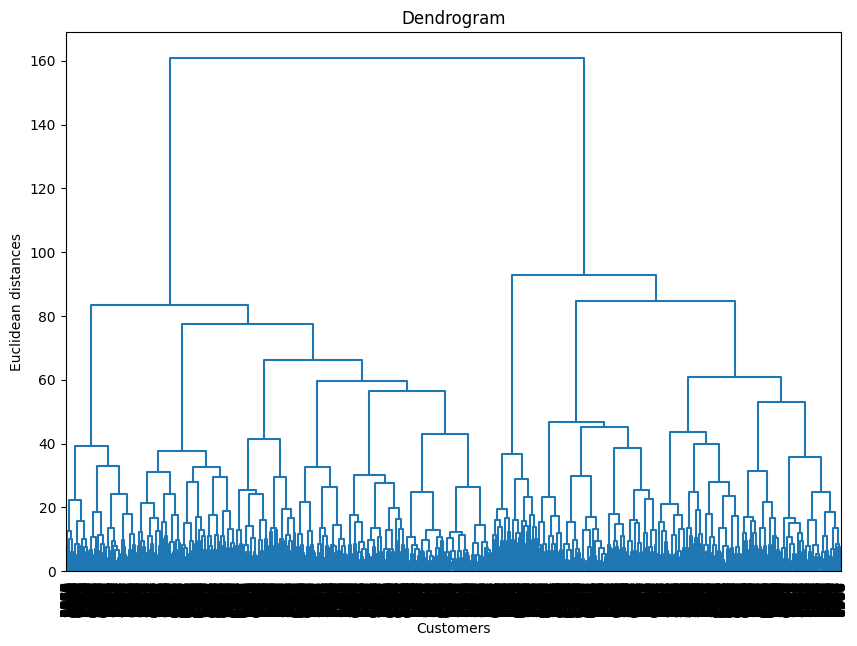

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linkage(data_scaled, method='ward'),color_threshold=0.8,leaf_rotation=90, leaf_font_size=10,
           show_contracted=True)
plt.title("Dendrogram")
plt.xlabel("Customers")
plt.ylabel("Euclidean distances")
plt.show()

In [35]:
# Choose an appropriate number of clusters based on the dendrogram
num_clusters = 3

In [36]:
# Perform hierarchical clustering with the chosen number of clusters
cluster = AgglomerativeClustering(n_clusters=num_clusters, affinity='euclidean', linkage='ward')
labels = cluster.fit_predict(data_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [37]:
# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
principal_components = pca.fit_transform(data_scaled)

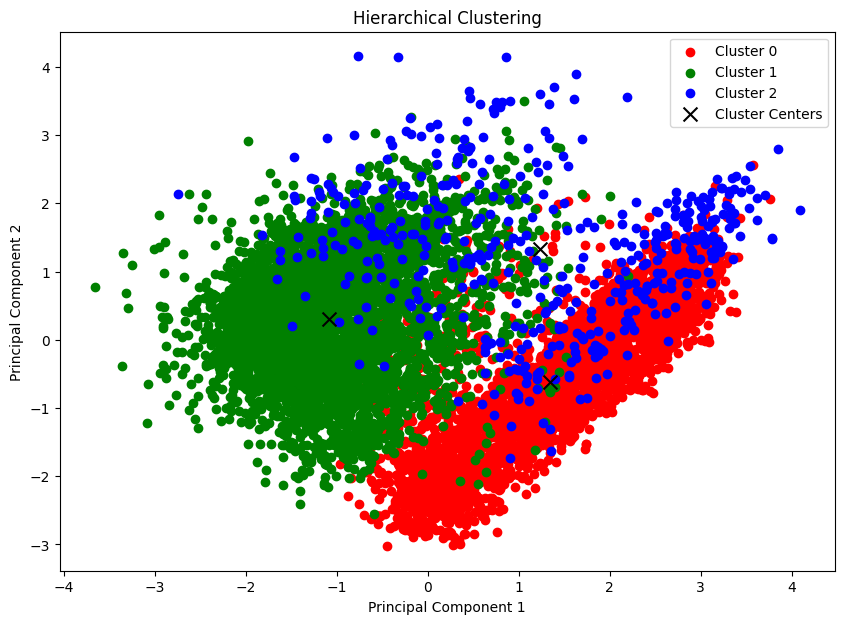

In [38]:
# Create a DataFrame with the PCA results and cluster labels
pca_df = pd.DataFrame(data=principal_components, columns=['principal component 1', 'principal component 2'])
pca_df['Cluster'] = labels

# Calculate the centroids of each cluster
centroids = pca_df.groupby('Cluster').mean()

# Plot the scatter plot
plt.figure(figsize=(10, 7))
colors = ['r', 'g', 'b', 'y', 'c', 'm']
for i in range(len(centroids)):
    plt.scatter(pca_df.loc[pca_df['Cluster'] == i, 'principal component 1'],
                pca_df.loc[pca_df['Cluster'] == i, 'principal component 2'],
                c=colors[i], label=f'Cluster {i}')

# Plot the cluster centroids
plt.scatter(centroids['principal component 1'], centroids['principal component 2'], c='black', marker='x', s=100, label='Cluster Centers')

plt.title("Hierarchical Clustering")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()

COMPARISION OF 3 CLUSTERING ALGORITHMS

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn_extra.cluster import KMedoids
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import silhouette_score

In [40]:
# Load the dataset
data = pd.read_csv("/content/drive/MyDrive/dataset/train_mall.csv")

In [41]:
# Preprocess the data
# Encode categorical variables
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data[['ID', 'Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1',
       'Segmentation']] = data[['ID', 'Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1',
       'Segmentation']].apply(le.fit_transform)

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [91]:
# Choose an appropriate number of clusters
num_clusters = 5

In [92]:
# Perform K-Means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans_labels = kmeans.fit_predict(data_scaled)

# Perform K-Medoids clustering
kmedoids = KMedoids(n_clusters=num_clusters, random_state=42)
kmedoids_labels = kmedoids.fit_predict(data_scaled)

# Perform Hierarchical clustering
hierarchical = AgglomerativeClustering(n_clusters=num_clusters, affinity='euclidean', linkage='ward')
hierarchical_labels = hierarchical.fit_predict(data_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [93]:
# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
principal_components = pca.fit_transform(data_scaled)

In [94]:
# Create a DataFrame with the PCA results and cluster labels
pca_df = pd.DataFrame(data=principal_components, columns=['principal component 1', 'principal component 2'])
pca_df['KMeans'] = kmeans_labels
pca_df['KMedoids'] = kmedoids_labels
pca_df['Hierarchical'] = hierarchical_labels

In [95]:
# Transform the cluster centers using PCA
kmeans_centers_2d = pca.transform(kmeans.cluster_centers_)
kmedoids_centers_2d = pca.transform(kmedoids.cluster_centers_)

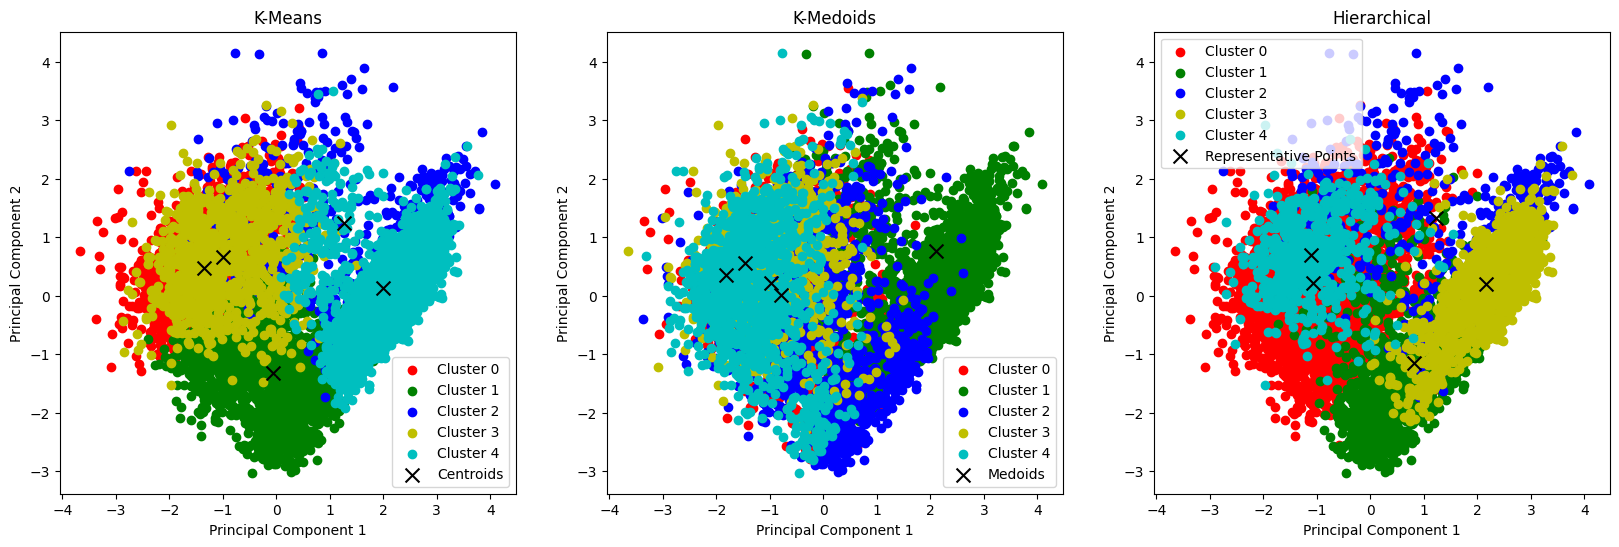

In [96]:
# Plot the scatter plots for each clustering algorithm
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
colors = ['r', 'g', 'b', 'y', 'c', 'm']
titles = ['K-Means', 'K-Medoids', 'Hierarchical']

for i, algorithm in enumerate(['KMeans', 'KMedoids', 'Hierarchical']):
    for j in range(num_clusters):
        axes[i].scatter(pca_df.loc[pca_df[algorithm] == j, 'principal component 1'],
                        pca_df.loc[pca_df[algorithm] == j, 'principal component 2'],
                        c=colors[j], label=f'Cluster {j}')
    if algorithm == 'KMeans':
        axes[i].scatter(kmeans_centers_2d[:, 0], kmeans_centers_2d[:, 1], c='black', marker='x', s=100, label='Centroids')
    elif algorithm == 'KMedoids':
        axes[i].scatter(kmedoids_centers_2d[:, 0], kmedoids_centers_2d[:, 1], c='black', marker='x', s=100, label='Medoids')
    elif algorithm == 'Hierarchical':
        for cluster in np.unique(hierarchical_labels):
            cluster_points = principal_components[hierarchical_labels == cluster]
            representative_point = cluster_points.mean(axis=0)
            axes[i].scatter(representative_point[0], representative_point[1], c='black', marker='x', s=100, label='Representative Points' if cluster == 0 else None)

    axes[i].set_title(titles[i])
    axes[i].set_xlabel("Principal Component 1")
    axes[i].set_ylabel("Principal Component 2")
    axes[i].legend()

plt.show()


Hierarchical clustering does not have explicit cluster centers like K-Means and K-Medoids. However, you can calculate the mean of each cluster as a representative point for visualization purposes. Here's how you can modify the plotting section to include representative points for Hierarchical clustering:

In [82]:
from sklearn.metrics import silhouette_score

In [83]:
# Calculate silhouette scores
kmeans_silhouette = silhouette_score(data_scaled, kmeans_labels)
kmedoids_silhouette = silhouette_score(data_scaled, kmedoids_labels)
hierarchical_silhouette = silhouette_score(data_scaled, hierarchical_labels)

In [84]:
print("Silhouette Scores:")
print(f"K-Means: {(kmeans_silhouette)*100}")
print(f"K-Medoids: {(kmedoids_silhouette)*100}")
print(f"Hierarchical: {(hierarchical_silhouette)*100}")

Silhouette Scores:
K-Means: 15.436914953704198
K-Medoids: 8.233117199789765
Hierarchical: 9.802558541130885


## CONCLUSION
Based on the Silhouette Scores for the three clustering algorithms, we can draw the following conclusions:

1. K-Means Clustering: With a Silhouette Score of 15.44, K-Means performs the best among the three algorithms. This indicates that the clusters generated by K-Means are more cohesive and well-separated compared to the other two methods. K-Means is known for its efficiency and is suitable for large datasets.

2. K-Medoids Clustering: With a Silhouette Score of 8.23, K-Medoids performs worse than K-Means but better than Hierarchical clustering. K-Medoids is more robust to outliers compared to K-Means, as it uses medoids (actual data points) as cluster centers instead of centroids (mean of data points). However, it may not be as efficient as K-Means, especially for large datasets.

3. Hierarchical Clustering: With a Silhouette Score of 9.80, Hierarchical clustering performs the worst among the three algorithms. This method is more sensitive to the choice of linkage criteria and distance metric. However, it provides a dendrogram that can help visualize the hierarchical structure of the data and decide on the appropriate number of clusters.

In conclusion, based on the Silhouette Scores, K-Means clustering appears to be the most suitable algorithm for this dataset. However, it's essential to consider other factors such as the dataset's size, the presence of outliers, and the desired level of interpretability when choosing the best clustering algorithm for a specific problem.